expectation value:  2
expected damage output between: 1 and 3
1 --> 86.16 %
2 --> 56.92 %
3 --> 29.02 %
4 --> 10.95 %
5 --> 3.09 %
6 --> 0.58 %
7 --> 0.1 %
8 --> 0.02 %


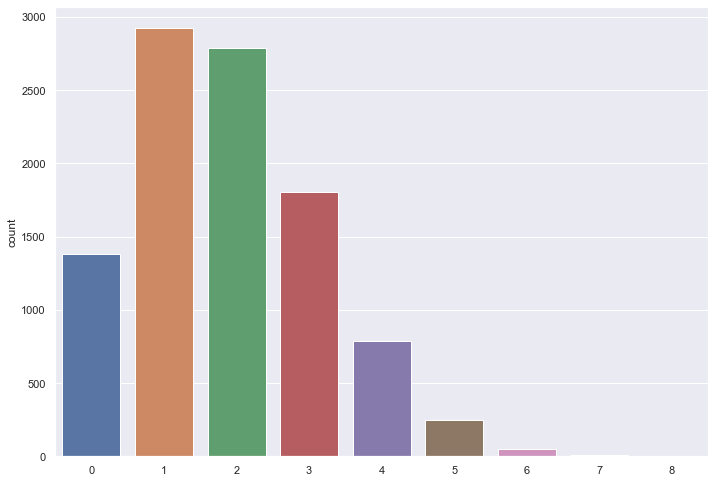

In [43]:
import random
import seaborn as sns

# ws = int(input('What is the hit roll for your attacks?'))
# S = int(input('What is the strength of your weapon?'))
# ap = int(input("What is your weapon's armor penetration?"))
# damage = int(input('What is the damage of your weapon?'))
# T = int(input('What is the toughness of your target?'))
# save =int(input("What is your target's save throw?"))
# attacks = int(input('how many attacks do you have?'))

random.seed(42)

# functions
def determine_wound_roll(S,T):
    wound = 5
    if S >= 2*T:
        wound = 2
    elif S > T:
        wound = 3
    elif S == T:
        wound = 4
    elif 2*S <= T:
        wound = 6
    if plus_1_to_wound:
        wound = wound - 1
    return wound

def roll_to_hit(ws):
    hit_roll = roll()
    if reroll_hit and hit_roll < ws:
        hit_roll = roll()
    elif reroll_1s_hit and hit_roll ==1:
        hit_roll = roll()
    if hit_roll == 6:
        return 'explode'
    elif hit_roll >= ws:
        return 'hit'
    else:
        return 'miss'

def roll_to_wound():
    wound_roll = roll()
    if reroll_wound and wound_roll < wound:
        wound_roll = roll()
    elif reroll_1s_wound and wound_roll ==1:
        wound_roll = roll()
    if wound_roll >= wound:
        return 'wound'
    else:
        return 'miss'

def roll_to_save():
    if roll() <= min(save + ap, invulnerable_save):
        return 'failed'
    else:
        return 'saved'

def apply_damage():
    results.append(damage)

# attacker characteristics
ws = 3
S = 4
ap = 0
damage = 1
attacks = 15

# defender characteristics
T = 4
save = 3
invulnerable_save = 7

# are there rerolls or modifiers in play
reroll_1s_hit = False
reroll_hit = False
reroll_1s_wound = False
reroll_wound = False
plus_1_to_wound = False
explode6_hit = False

# set variables
num_sims = 10000
spread = []

#define a roll
def roll(s=6):
    return random.randint(1,s)

#determine the wound roll
wound = determine_wound_roll(S,T)

# do 1000 simulations
for i in range(num_sims):
    results = []
    shot = 1
    while shot <= attacks:
        shot += 1
        # hit roll
        if roll_to_hit(ws) == ('hit' or 'explode'):
            
            # wound roll
            if roll_to_wound() == 'wound':
                    
                # save roll
                if roll_to_save() == 'failed':
                    apply_damage()
                else:
                    results.append(0)
            else: 
                results.append(0)
        else:
            results.append(0)

    spread.append(sum(results))
spread.sort()
# print(spread)
print('expectation value: ', spread[round(num_sims/2)])
print('expected damage output between:',spread[round(num_sims*.1667)],'and',spread[round(num_sims*.8333)])
# probability of each outcome
outcome = 0

for index, number in enumerate(spread):
    if number > outcome:
        outcome = number
        print(outcome,'-->', round((num_sims-index)*100/num_sims,2), '%' )

sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.countplot(x=spread)
# g.set_yticklabels(['0%','2%','4%','6%','8%','10%','12%','14%'])